In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

df = pd.read_csv(
    "/content/drive/MyDrive/infosys internship/dataset - 2020-09-24.csv"
)

df.head()



Mounted at /content/drive


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [2]:
df[['Goals', 'Appearances', 'Passes']].head()

,Goals,Appearances,Passes
0,0,64,1783
1,0,0,0
2,0,0,0
3,7,160,7125
4,1,16,519


In [4]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

minmax_cols = ['Goals', 'Appearances', 'Passes', 'Assists']
df_minmax = df.copy()

df_minmax[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])
df_minmax[minmax_cols].head()

,Goals,Appearances,Passes,Assists
0,0.000000,0.118738,0.099431,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,0.038889,0.296846,0.397334,0.214286
4,0.005556,0.029685,0.028943,0.011905


In [11]:
df[['Goals','Shots','Passes']].isnull().sum()


,0
Goals,0
Shots,262
Passes,0


In [16]:
# Fill missing values with 0 for StandardScaler step
cols_to_fill = ['Goals', 'Shots', 'Passes']
df_filled = df[cols_to_fill].fillna(0)



In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[cols_to_fill] = scaler.fit_transform(df_filled)

df_scaled[cols_to_fill].head()


,Goals,Shots,Passes
0,-0.436270,-0.469774,-0.168573
1,-0.436270,-0.469774,-0.739227
2,-0.436270,-0.469774,-0.739227
3,-0.019499,-0.469774,1.541148
4,-0.376732,-0.469774,-0.573119


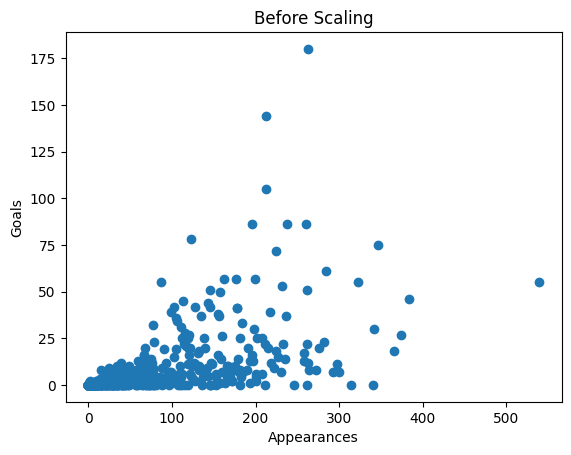

In [19]:

import matplotlib.pyplot as plt

# Scatter plot before scaling
plt.figure()
plt.scatter(df['Appearances'], df['Goals'])
plt.xlabel("Appearances")
plt.ylabel("Goals")
plt.title("Before Scaling")
plt.show()


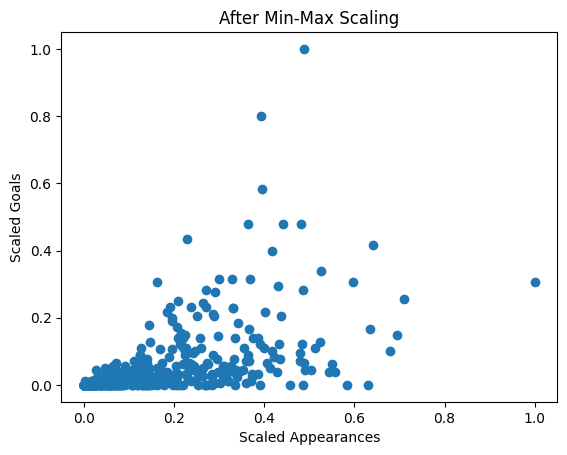

In [20]:

plt.figure()
plt.scatter(df_minmax['Appearances'], df_minmax['Goals'])
plt.xlabel("Scaled Appearances")
plt.ylabel("Scaled Goals")
plt.title("After Min-Max Scaling")
plt.show()

In [21]:
df_minmax.to_csv("minmax_scaled_epl.csv", index=False)
df_std.to_csv("standard_scaled_epl.csv", index=False)